In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('dataset.csv')

In [3]:
data.head()

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [4]:
data.shape

(11055, 32)

In [5]:
data['Result'].value_counts()

 1    6157
-1    4898
Name: Result, dtype: int64

In [6]:
#data['Result'].replace({1 :'Legitimate', -1 :'Phishing'},inplace=True)

In [7]:
#data['Result']

0          Phishing
1          Phishing
2          Phishing
3          Phishing
4        Legitimate
            ...    
11050    Legitimate
11051      Phishing
11052      Phishing
11053      Phishing
11054      Phishing
Name: Result, Length: 11055, dtype: object

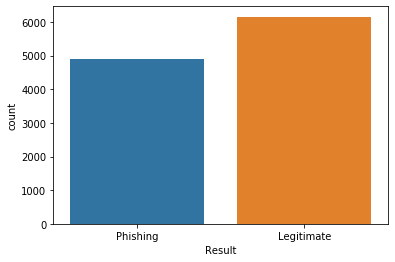

In [8]:
#sns.countplot(data['Result'])

In [9]:
data.replace({-1:2}, inplace=True)

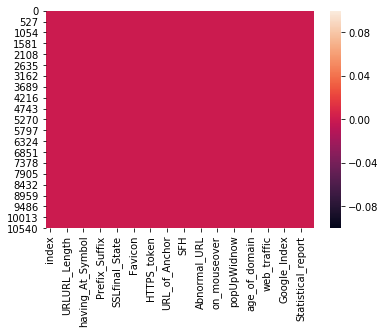

In [10]:
sns.heatmap(data.isnull())
#this heatmap represents the presence of no null values

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 32 columns):
index                          11055 non-null int64
having_IPhaving_IP_Address     11055 non-null int64
URLURL_Length                  11055 non-null int64
Shortining_Service             11055 non-null int64
having_At_Symbol               11055 non-null int64
double_slash_redirecting       11055 non-null int64
Prefix_Suffix                  11055 non-null int64
having_Sub_Domain              11055 non-null int64
SSLfinal_State                 11055 non-null int64
Domain_registeration_length    11055 non-null int64
Favicon                        11055 non-null int64
port                           11055 non-null int64
HTTPS_token                    11055 non-null int64
Request_URL                    11055 non-null int64
URL_of_Anchor                  11055 non-null int64
Links_in_tags                  11055 non-null int64
SFH                            11055 non-null int64
Submitt

In [12]:
X = data.drop('Result', axis=1)
y = data['Result']

In [13]:
X = X.astype(str)

In [14]:
type(X)

pandas.core.frame.DataFrame

In [ ]:
########################################  DATA PRE-PROCESSING #####################################################

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=100)

In [17]:
from sklearn.feature_selection import SelectKBest, chi2

In [18]:
fs = SelectKBest(score_func=chi2, k='all')
fs.fit(X_train, y_train)
X_train_fs = fs.transform(X_train)
X_test_fs = fs.transform(X_test)

Feature 0: 916.345903
Feature 1: 11.191841
Feature 2: 1.220830
Feature 3: 2.565374
Feature 4: 2.366921
Feature 5: 0.698187
Feature 6: 56.722424
Feature 7: 33.428590
Feature 8: 138.979136
Feature 9: 51.286348
Feature 10: 0.003062
Feature 11: 1.181231
Feature 12: 1.364872
Feature 13: 88.415885
Feature 14: 2238.666182
Feature 15: 197.181616
Feature 16: 51.419478
Feature 17: 0.533514
Feature 18: 2.449819
Feature 19: 4.116745
Feature 20: 1.334219
Feature 21: 0.058313
Feature 22: 0.002525
Feature 23: 0.059811
Feature 24: 19.736243
Feature 25: 6.873871
Feature 26: 1.249762
Feature 27: 9.553555
Feature 28: 14.340002
Feature 29: 35.398027
Feature 30: 5.145421


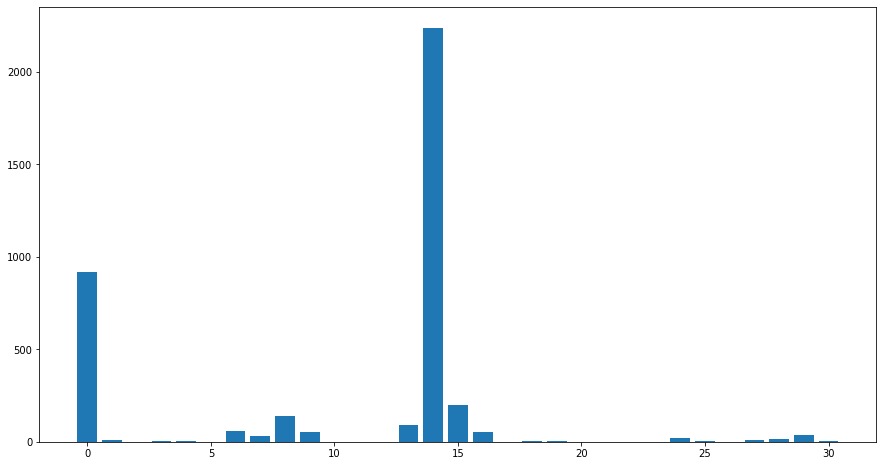

In [19]:
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.figure(figsize = (15,8))
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [20]:
# 6,7,8,9,13,14,15,16,24,29 (Selected features)
new_data = data.filter(['Prefix_Suffix','having_Sub_Domain','SSLfinal_State','Domain_registeration_length','Request_URL',
                        'URL_of_Anchor','Links_in_tags','SFH','age_of_domain','Links_pointing_to_page','Result'],axis=1)

In [21]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 11 columns):
Prefix_Suffix                  11055 non-null int64
having_Sub_Domain              11055 non-null int64
SSLfinal_State                 11055 non-null int64
Domain_registeration_length    11055 non-null int64
Request_URL                    11055 non-null int64
URL_of_Anchor                  11055 non-null int64
Links_in_tags                  11055 non-null int64
SFH                            11055 non-null int64
age_of_domain                  11055 non-null int64
Links_pointing_to_page         11055 non-null int64
Result                         11055 non-null object
dtypes: int64(10), object(1)
memory usage: 950.2+ KB


In [22]:
X = new_data.drop('Result', axis=1)
y = new_data['Result']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [ ]:
#########################################  LOGISTIC REGRESSION  #######################################################

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
logmodel = LogisticRegression()
classifier = logmodel.fit(X_train,y_train)

In [26]:
pred = logmodel.predict(X_test)

In [27]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

  Legitimate       0.82      0.86      0.84      1818
    Phishing       0.82      0.77      0.80      1499

    accuracy                           0.82      3317
   macro avg       0.82      0.82      0.82      3317
weighted avg       0.82      0.82      0.82      3317

[[1572  246]
 [ 346 1153]]


In [47]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, pred, normalize=True))

0.8215254748266506


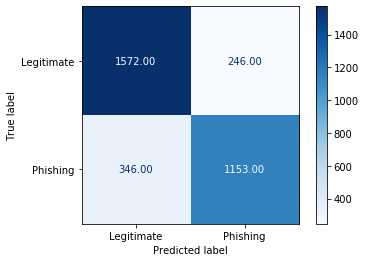

In [28]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier, X_test, y_test, cmap='Blues',values_format= '.2f')

In [ ]:
###############################################  BAGGING  ##############################################################

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier()

In [32]:
#number of trees
params_rf = {'n_estimators': [50, 100, 200]}
rf_gs = GridSearchCV(rf, params_rf, cv=5)

In [ ]:
rf_gs.fit(X_train, y_train)

In [34]:
#best estimator
rf_best = rf_gs.best_estimator_
print(rf_gs.best_params_)

{'n_estimators': 50}


In [35]:
rpred = rf_gs.predict(X_test)

In [36]:
print(classification_report(y_test,rpred))
print(confusion_matrix(y_test,rpred))

              precision    recall  f1-score   support

  Legitimate       0.94      0.95      0.95      1818
    Phishing       0.94      0.93      0.94      1499

    accuracy                           0.94      3317
   macro avg       0.94      0.94      0.94      3317
weighted avg       0.94      0.94      0.94      3317

[[1735   83]
 [ 103 1396]]


In [48]:
print(accuracy_score(y_test, rpred, normalize=True))

0.9439252336448598


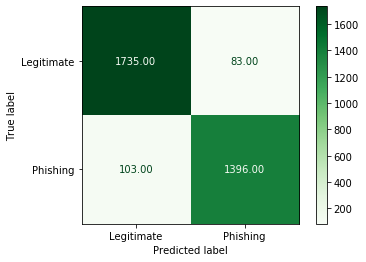

In [37]:
plot_confusion_matrix(rf_gs, X_test, y_test, cmap='Greens',values_format= '.2f')

In [ ]:
#################################################  BOOSTING  ###########################################################

In [38]:
from xgboost import XGBClassifier
model = XGBClassifier()

In [39]:
model.fit(X_train, y_train)
model_pred = model.predict(X_test)

In [40]:
print(classification_report(y_test,model_pred))
print(confusion_matrix(y_test,model_pred))

              precision    recall  f1-score   support

  Legitimate       0.92      0.96      0.94      1818
    Phishing       0.95      0.90      0.93      1499

    accuracy                           0.93      3317
   macro avg       0.94      0.93      0.93      3317
weighted avg       0.93      0.93      0.93      3317

[[1745   73]
 [ 146 1353]]


In [49]:
print(accuracy_score(y_test, model_pred, normalize=True))

0.9339764847753994


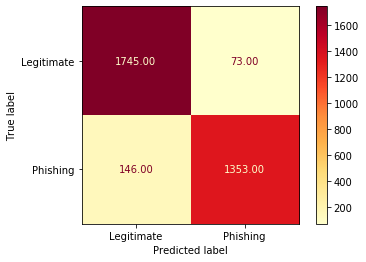

In [41]:
plot_confusion_matrix(model, X_test, y_test, cmap='YlOrRd',values_format= '.2f')

In [ ]:
#########################################################################################################################

In [42]:
from sklearn.ensemble import AdaBoostClassifier
model2 = AdaBoostClassifier(n_estimators = 30, random_state= 100)

In [43]:
model2.fit(X_train, y_train)
model2_pred= model2.predict(X_test)

In [44]:
print(classification_report(y_test,model2_pred))
print(confusion_matrix(y_test,model2_pred))

              precision    recall  f1-score   support

  Legitimate       0.92      0.95      0.93      1818
    Phishing       0.94      0.89      0.92      1499

    accuracy                           0.93      3317
   macro avg       0.93      0.92      0.93      3317
weighted avg       0.93      0.93      0.93      3317

[[1733   85]
 [ 158 1341]]


In [50]:
print(accuracy_score(y_test, model2_pred, normalize=True))

0.9267410310521556


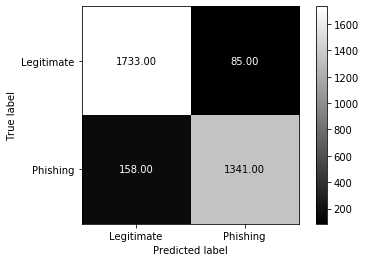

In [45]:
plot_confusion_matrix(model2, X_test, y_test, cmap='gray',values_format= '.2f')